<a href="https://colab.research.google.com/github/tedblackson/Stock-Price-Predictor/blob/Models/Stock_Price_Prediction_Decision_Tree_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Stock Price Prediction Using Decision Tree and Linear Regression

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import io
from google.colab.files import upload
uploaded = upload()

Saving AAPL.csv to AAPL.csv


In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['AAPL.csv']))

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-29,100.589996,100.690002,98.040001,99.620003,93.514290,142718700
1,2014-10-06,99.949997,102.379997,98.309998,100.730003,94.556244,280258200
2,2014-10-13,101.330002,101.779999,95.180000,97.669998,91.683792,358539800
3,2014-10-20,98.320000,105.489998,98.220001,105.220001,98.771042,358532900
4,2014-10-27,104.849998,108.040001,104.699997,108.000000,101.380676,220230600


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       184 non-null    object 
 1   Open       184 non-null    float64
 2   High       184 non-null    float64
 3   Low        184 non-null    float64
 4   Close      184 non-null    float64
 5   Adj Close  184 non-null    float64
 6   Volume     184 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 10.2+ KB


In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,184.000000,184.000000,184.000000,184.000000,184.000000,1.840000e+02
mean,127.040245,129.918098,124.340381,127.352663,123.838032,1.910168e+08
std,24.314449,24.577906,24.176736,24.356534,25.655569,8.160281e+07
min,92.389999,93.769997,89.470001,90.519997,87.796822,3.839850e+07
25%,108.882499,112.362499,106.152502,109.204998,105.301765,1.273706e+08
50%,118.895000,120.865002,116.870003,119.190002,114.999730,1.744112e+08
75%,144.935005,147.695000,143.227493,144.704994,143.039467,2.207755e+08
max,180.289993,183.500000,177.619995,179.979996,179.979996,5.003630e+08


In [ ]:
df.shape

(184, 7)

In [ ]:
df2 = df['Close']

In [ ]:
df2.tail()

179    179.979996
180    178.020004
181    164.940002
182    167.779999
183    167.779999
Name: Close, dtype: float64

In [ ]:
df2 = pd.DataFrame(df2)

In [ ]:
df2.tail()

,Close
179,179.979996
180,178.020004
181,164.940002
182,167.779999
183,167.779999


In [ ]:
future_days = 80
df2['Prediction'] = df2['Close'].shift(-future_days)

In [ ]:
df2.tail()

,Close,Prediction
179,179.979996,NaN
180,178.020004,NaN
181,164.940002,NaN
182,167.779999,NaN
183,167.779999,NaN


In [ ]:
X = np.array(df2.drop(['Prediction'], 1))[:-future_days]
print(X)

[[ 99.620003]
 [100.730003]
 [ 97.669998]
 [105.220001]
 [108.      ]
 [109.010002]
 [114.18    ]
 [116.470001]
 [118.93    ]
 [115.      ]
 [109.730003]
 [111.779999]
 [113.989998]
 [109.330002]
 [112.010002]
 [105.989998]
 [112.980003]
 [117.160004]
 [118.93    ]
 [127.080002]
 [129.5     ]
 [128.460007]
 [126.599998]
 [123.589996]
 [125.900002]
 [123.25    ]
 [125.32    ]
 [127.099998]
 [124.75    ]
 [130.279999]
 [128.949997]
 [127.620003]
 [128.770004]
 [132.539993]
 [130.279999]
 [128.649994]
 [127.169998]
 [126.599998]
 [126.75    ]
 [126.440002]
 [123.279999]
 [129.619995]
 [124.5     ]
 [121.300003]
 [115.519997]
 [115.959999]
 [105.760002]
 [113.290001]
 [109.269997]
 [114.209999]
 [113.449997]
 [114.709999]
 [110.379997]
 [112.120003]
 [111.040001]
 [119.080002]
 [119.5     ]
 [121.059998]
 [112.339996]
 [119.300003]
 [117.809998]
 [119.029999]
 [113.18    ]
 [106.029999]
 [108.029999]
 [105.260002]
 [ 96.959999]
 [ 97.129997]
 [101.419998]
 [ 97.339996]
 [ 94.019997]
 [ 93.

<ipython-input-17-5c69b61eae2a>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = np.array(df2.drop(['Prediction'], 1))[:-future_days]


In [ ]:
Y = np.array(df2['Prediction'])[:-future_days]
print(Y)

[109.849998 105.68      93.739998  92.720001  90.519997  95.220001
 100.349998  97.919998  98.830002  95.330002  93.400002  95.889999
  96.68      98.779999  98.660004 104.209999 107.480003 108.18
 109.360001 106.940002 107.730003 103.129997 114.919998 112.709999
 113.050003 114.059998 117.629997 116.599998 113.720001 108.839996
 108.43     110.059998 111.790001 109.900002 113.949997 115.970001
 116.519997 115.82     117.910004 119.040001 120.       121.949997
 129.080002 132.119995 135.720001 136.660004 139.779999 139.139999
 139.990005 140.639999 143.660004 143.339996 141.050003 142.270004
 143.649994 148.960007 156.100006 153.059998 153.610001 155.449997
 148.979996 142.270004 146.279999 144.020004 144.179993 149.039993
 150.270004 149.5      156.389999 157.479996 157.5      159.860001
 164.050003 158.630005 159.880005 151.889999 154.119995 155.300003
 156.990005 156.25     163.050003 172.5      174.669998 170.149994
 174.970001 171.050003 169.369995 173.970001 175.009995 169.229996

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)


In [ ]:
 
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

In [ ]:
tree = DecisionTreeRegressor().fit(x_train, y_train)
linear = LinearRegression().fit(x_train, y_train)

In [ ]:
x_future = df2.drop(['Prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future


<ipython-input-22-4ab4510f9901>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x_future = df2.drop(['Prediction'], 1)[:-future_days]


array([[125.900002],
       [123.25    ],
       [125.32    ],
       [127.099998],
       [124.75    ],
       [130.279999],
       [128.949997],
       [127.620003],
       [128.770004],
       [132.539993],
       [130.279999],
       [128.649994],
       [127.169998],
       [126.599998],
       [126.75    ],
       [126.440002],
       [123.279999],
       [129.619995],
       [124.5     ],
       [121.300003],
       [115.519997],
       [115.959999],
       [105.760002],
       [113.290001],
       [109.269997],
       [114.209999],
       [113.449997],
       [114.709999],
       [110.379997],
       [112.120003],
       [111.040001],
       [119.080002],
       [119.5     ],
       [121.059998],
       [112.339996],
       [119.300003],
       [117.809998],
       [119.029999],
       [113.18    ],
       [106.029999],
       [108.029999],
       [105.260002],
       [ 96.959999],
       [ 97.129997],
       [101.419998],
       [ 97.339996],
       [ 94.019997],
       [ 93.9

In [ ]:
tree_prediction = tree.predict(x_future)
print(tree_prediction)

[113.050003  114.059998  117.629997  116.599998  129.080002  111.3949965
 108.43      110.059998  111.790001  109.900002  111.3949965 115.970001
 116.519997  115.82      117.910004  119.040001  120.        121.949997
 129.080002  132.119995  135.720001  136.660004  154.119995  139.139999
 139.990005  140.639999  139.139999  143.339996  141.050003  142.270004
 143.649994  148.960007  156.100006  153.059998  153.610001  155.449997
 148.979996  142.270004  146.279999  144.020004  144.179993   92.720001
 150.270004  149.5       156.389999  149.5       157.5       159.860001
 177.089996  150.270004  159.880005  151.889999  154.119995  154.119995
 156.990005   95.220001   93.400002  154.119995  174.669998  170.149994
 174.970001  171.050003  169.369995  173.970001  175.009995  169.229996
 174.669998  177.089996  150.270004  171.509995  171.509995  156.410004
 178.020004  175.5       176.210007  179.979996  178.020004  164.940002
 167.779999  167.779999 ]


In [ ]:
lr_prediction = linear.predict(x_future)
print(lr_prediction)


[117.17678414 120.96850879 118.00667328 115.45978378 118.82225118
 110.90971621 112.81273415 114.71574065 113.07027505 107.67602999
 110.90971621 113.24198997 115.35962509 116.17520298 115.96057436
 116.4041314  120.92558507 111.85407528 119.17996078 123.75863939
 132.02889398 131.39932222 145.99386969 135.21965791 140.97163403
 133.90328943 134.99072948 133.18787023 139.3834034  136.89373598
 138.43904433 126.93510209 126.33415282 124.10204776 136.57896155
 126.62031621 128.75227259 127.0066483  135.37705156 145.60754761
 142.7458708  146.7092889  158.58525198 158.34201231 152.20371411
 158.04153768 162.79191976 162.83484348 159.90162045 158.65678675
 149.92867532 151.00180412 145.76494127 146.12265087 139.94142895
 141.84443545 140.14174632 146.10833963 163.19255309 164.65200397
 167.79985419 161.07490795 153.73471121 157.21164854 155.90957986
 160.91751429 163.67903242 160.11624908 158.9858853  155.98112608
 156.15281953 148.21167352 143.5328262  142.5312436  140.84285285
 144.30548

In [ ]:
predictions = tree_prediction 
valid = df2[X.shape[0]:]
valid['Predictions'] = predictions


<ipython-input-25-3343a07a945e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


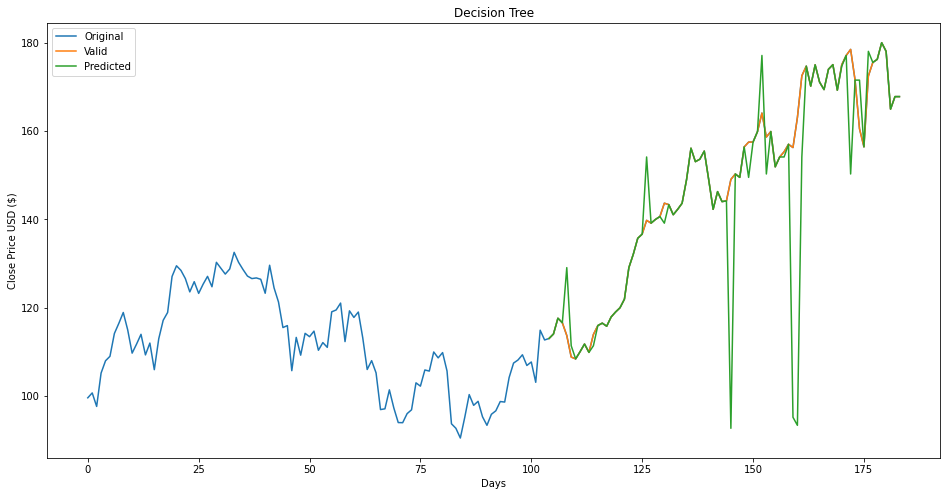

In [ ]:
plt.figure(figsize=(16,8))
plt.title("Decision Tree")
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df2['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(["Original", "Valid", 'Predicted'])
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
mean_absolute_error(valid['Close'], valid['Predictions'])


4.004875112500001

In [ ]:
mean_squared_error(valid['Close'], valid['Predictions'])


172.66072860963033

In [ ]:
r2_score(valid['Close'], valid['Predictions'])


0.6256835081885906

In [ ]:
predictions = lr_prediction
valid = df2[X.shape[0]:]
valid['Predictions'] = predictions

<ipython-input-31-bf81036e7177>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


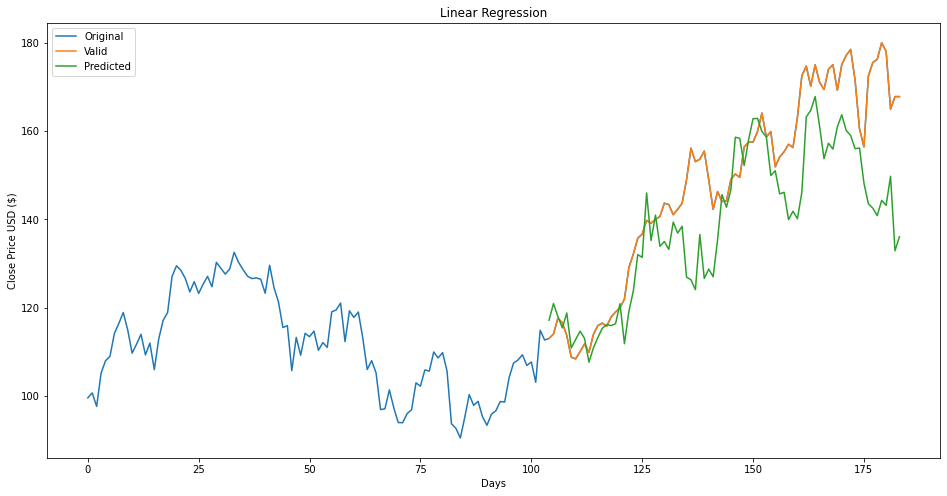

In [ ]:
plt.figure(figsize=(16,8))
plt.title("Linear Regression")
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df2['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(["Original", "Valid", 'Predicted'])
plt.show()

In [ ]:
mean_absolute_error(valid['Close'], valid['Predictions'])


10.905703879933771

In [ ]:
mean_squared_error(valid['Close'], valid['Predictions'])


220.3262347062549

In [ ]:
r2_score(valid['Close'], valid['Predictions'])


0.522347994860352

In [ ]:
from sklearn.tree import export_graphviz

In [ ]:
export_graphviz(tree, out_file = 'tree_structure.dot', feature_names = ['Close'] )

# New Section